# **1. PROJECT INFORMATION**

##055033 - Priyadarshani Dash

# Build Supervised Learning Models using Python: Classification & Regression

###DESCRIPTION OF DATA
####Data Information

Data Size: 2.56 MB

Data Type: Panel

Data Dimension

No. of Variables: 16

No. of Observations: 15,000

Data Variable Type

Numeric
Integer: Quantity, Customs_Code, Invoice_Number

Decimal: Value, Weight

Non-Numeric:
Transaction_ID, Customs_Code, Invoice_Number, Product, Supplier, Cu, Shipping_Method, Countrysomer, Date, Port

Data Variable Category - I

Categorical
Nominal: Import_Export, Category, Shipping_Method, Payment_Terms, Country
Ordinal:

Non-Categorical
Quantity, Value, Weight

Data Variable Category - II

Transaction_ID: Unique identifier for each trade transaction.

Country: Country of origin or destination for the trade.

Product: Product being traded.

Import_Export: Indicates whether the transaction is an import or export.

Quantity: Amount of the product traded.

Value: Monetary value of the product in USD.

Date: Date of the transaction.

Category: Category of the product (e.g., Electronics, Clothing, Machinery).

Port: Port of entry or departure.

Customs_Code: Customs or HS code for product classification.

Weight: Weight of the product in kilograms.

Shipping_Method: Method used for shipping (e.g., Air, Sea, Land).

Supplier: Name of the supplier or manufacturer.

Customer: Name of the customer or recipient.

Invoice_Number: Unique invoice number for the transaction.

Payment_Terms: Terms of payment (e.g., Net 30, Net 60, Cash on Delivery).

About Dataset

This dataset provides detailed information on international trade transactions, capturing both import and export activities. It includes comprehensive data on various aspects of trade, making it a valuable resource for business analysis, economic research, and financial modeling.

###PROJECT OBJECTIVES
3. Project Objectives and Problem Statements:

#####Project Objectives
Analyze international trade trends, focusing on imports and exports by country and product.
Develop predictive models to forecast trade volumes based on historical data.
Detect anomalies in trade data for potential fraud or regulatory compliance issues.
Provide actionable insights to optimize supply chain logistics and reduce costs.
#####Problem Statements
How can trade transactions be classified and categorized using the given variables?
What factors influence variations in import and export volumes by country and category?
Can we predict future trade volumes for specific products or regions?
How do payment terms and shipping methods affect the trade cycle?
Are there inconsistencies or anomalies in the dataset that may suggest errors or fraud?


##Analysis Of Data


In [ ]:
#Import relevant libraries
import pandas as pd
import statsmodels.stats.descriptivestats as dstats
import numpy as np  # For Data Manipulation
from sklearn.preprocessing import OrdinalEncoder  # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.impute import SimpleImputer  # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler  # For Rescaling Data
from sklearn.model_selection import train_test_split  # For Splitting Data into Training & Testing Sets
import matplotlib.pyplot as plt
import seaborn as sns  # For Data Visualization
import statsmodels.api as sm
import io
import requests
from scipy.stats import shapiro
from scipy.stats import spearmanr, kendalltau
from scipy.stats import skew, kurtosis, pearsonr, norm
from scipy.stats import chi2_contingency
from scipy import stats
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.tree import export_text

In [ ]:
pd33_url = 'https://raw.githubusercontent.com/Harshit-Badgamia/MLM_Supervised_Learning/refs/heads/main/Imports_Exports_Dataset.csv'
pd33_response = requests.get(pd33_url)
pd33_response.raise_for_status()  # Raise an exception for bad responses

# Read the data into a pandas DataFrame using io
pd33_imports_exports = pd.read_csv(io.StringIO(pd33_response.text))

pd33_imports_exports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   15000 non-null  object 
 1   Country          15000 non-null  object 
 2   Product          15000 non-null  object 
 3   Import_Export    15000 non-null  object 
 4   Quantity         15000 non-null  int64  
 5   Value            15000 non-null  float64
 6   Date             15000 non-null  object 
 7   Category         15000 non-null  object 
 8   Port             15000 non-null  object 
 9   Customs_Code     15000 non-null  int64  
 10  Weight           15000 non-null  float64
 11  Shipping_Method  15000 non-null  object 
 12  Supplier         15000 non-null  object 
 13  Customer         15000 non-null  object 
 14  Invoice_Number   15000 non-null  int64  
 15  Payment_Terms    15000 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 1.8+ MB


In [ ]:
pd33_ds = pd33_imports_exports.sample(n = 5001, random_state=55033)
pd33_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5001 entries, 13738 to 2623
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Transaction_ID   5001 non-null   object 
 1   Country          5001 non-null   object 
 2   Product          5001 non-null   object 
 3   Import_Export    5001 non-null   object 
 4   Quantity         5001 non-null   int64  
 5   Value            5001 non-null   float64
 6   Date             5001 non-null   object 
 7   Category         5001 non-null   object 
 8   Port             5001 non-null   object 
 9   Customs_Code     5001 non-null   int64  
 10  Weight           5001 non-null   float64
 11  Shipping_Method  5001 non-null   object 
 12  Supplier         5001 non-null   object 
 13  Customer         5001 non-null   object 
 14  Invoice_Number   5001 non-null   int64  
 15  Payment_Terms    5001 non-null   object 
dtypes: float64(2), int64(3), object(11)
memory usage: 664.2+ KB


In [ ]:
#Subset of Non-Categorical Variables
pd33_ds_noncat = pd33_ds[['Quantity','Value','Weight']]
pd33_ds_noncat.head()

,Quantity,Value,Weight
13738,2811,3261.43,1642.61
6048,3132,6888.71,4073.87
9355,3304,4979.81,4222.26
12264,772,7107.68,1549.18
7182,8428,3181.04,2422.30


In [ ]:
# Subset of categorical variables
pd33_ds_cat = pd33_ds[['Import_Export', 'Category', 'Shipping_Method', 'Payment_Terms']]
pd33_ds_cat.head()

,Import_Export,Category,Shipping_Method,Payment_Terms
13738,Export,Electronics,Sea,Prepaid
6048,Export,Toys,Land,Net 30
9355,Import,Toys,Sea,Prepaid
12264,Export,Furniture,Air,Cash on Delivery
7182,Import,Clothing,Air,Net 30


## Preprocessing

### Missing Data Treatment

In [ ]:
# Handling Missing Data
def missing_data_summary(df):
    """
    Creates a DataFrame summarizing missing data statistics.

    Args:
        df: The input DataFrame.

    Returns:
        A DataFrame with missing data count and percentage for each variable and row.
    """
    # Column-wise summary
    missing_count_col = df.isnull().sum()
    missing_percentage_col = (missing_count_col / len(df)) * 100
    missing_summary_col = pd.DataFrame({
        'Missing Count': missing_count_col,
        'Missing Percentage': missing_percentage_col
    })
    # Row-wise summary
    missing_count_row = df.isnull().sum(axis=1)
    missing_percentage_row = (missing_count_row / len(df.columns)) * 100
    missing_summary_row = pd.DataFrame({
        'Missing Count': missing_count_row,
        'Missing Percentage': missing_percentage_row
    }, index=df.index)  # Use original DataFrame index

    return missing_summary_col, missing_summary_row

# Calculate missing data summary for categorical subset
pd33_missing_summary_cat_col, pd33_missing_summary_cat_row = missing_data_summary(pd33_ds_cat)

# Calculate missing data summary for non-categorical subset
pd33_missing_summary_noncat_col, pd33_missing_summary_noncat_row = missing_data_summary(pd33_ds_noncat)

# Drop columns and rows with more than 50% missing data for categorical subset
pd33_ds_cat_treated = pd33_ds_cat.dropna(thresh=len(pd33_ds_cat) * 0.5, axis=1)
pd33_ds_cat_treated = pd33_ds_cat_treated.dropna(thresh=len(pd33_ds_cat_treated.columns) * 0.5, axis=0)

# Drop columns and rows with more than 50% missing data for non-categorical subset
pd33_ds_noncat_treated = pd33_ds_noncat.dropna(thresh=len(pd33_ds_noncat) * 0.5, axis=1)
pd33_ds_noncat_treated = pd33_ds_noncat_treated.dropna(thresh=len(pd33_ds_noncat_treated.columns) * 0.5, axis=0)

# Calculate total variables and rows dropped
pd33_dropped_variables_cat = len(pd33_ds_cat.columns) - len(pd33_ds_cat_treated.columns)
pd33_dropped_rows_cat = len(pd33_ds_cat) - len(pd33_ds_cat_treated)
pd33_dropped_variables_noncat = len(pd33_ds_noncat.columns) - len(pd33_ds_noncat_treated.columns)
pd33_dropped_rows_noncat = len(pd33_ds_noncat) - len(pd33_ds_noncat_treated)

pd33_total_dropped_variables = pd33_dropped_variables_cat + pd33_dropped_variables_noncat
pd33_total_dropped_rows = pd33_dropped_rows_cat + pd33_dropped_rows_noncat

# Print missing data summaries
print("Categorical Missing Data Summary (Columns):")
print(pd33_missing_summary_cat_col)
print("\nCategorical Missing Data Summary (Rows):")
print(pd33_missing_summary_cat_row)
print("\nNon-Categorical Missing Data Summary (Columns):")
print(pd33_missing_summary_noncat_col)
print("\nNon-Categorical Missing Data Summary (Rows):")
print(pd33_missing_summary_noncat_row)

# Print total dropped variables and rows
print(f"\nTotal variables dropped: {pd33_total_dropped_variables}")
print(f"Total rows dropped: {pd33_total_dropped_rows}")

Categorical Missing Data Summary (Columns):
                 Missing Count  Missing Percentage
Import_Export                0                 0.0
Category                     0                 0.0
Shipping_Method              0                 0.0
Payment_Terms                0                 0.0

Categorical Missing Data Summary (Rows):
       Missing Count  Missing Percentage
13738              0                 0.0
6048               0                 0.0
9355               0                 0.0
12264              0                 0.0
7182               0                 0.0
...              ...                 ...
8178               0                 0.0
1766               0                 0.0
2536               0                 0.0
2766               0                 0.0
2623               0                 0.0

[5001 rows x 2 columns]

Non-Categorical Missing Data Summary (Columns):
          Missing Count  Missing Percentage
Quantity              0                 0.0
Value

In [ ]:
# Create imputers for categorical and non-categorical data
pd33_imputer_cat = SimpleImputer(strategy='most_frequent')  # Mode for categorical
pd33_imputer_noncat = SimpleImputer(strategy='mean')  # Mean for non-categorical

# Fit and transform imputers on the treated datasets
pd33_ds_cat_imputed = pd.DataFrame(pd33_imputer_cat.fit_transform(pd33_ds_cat_treated),
                                  columns=pd33_ds_cat_treated.columns,
                                  index=pd33_ds_cat_treated.index)
pd33_ds_noncat_imputed = pd.DataFrame(pd33_imputer_noncat.fit_transform(pd33_ds_noncat_treated),
                                    columns=pd33_ds_noncat_treated.columns,
                                    index=pd33_ds_noncat_treated.index)

# Count imputed values
pd33_imputed_count_cat = pd33_ds_cat_imputed.isnull().sum().sum() - pd33_ds_cat_treated.isnull().sum().sum()
pd33_imputed_count_noncat = pd33_ds_noncat_imputed.isnull().sum().sum() - pd33_ds_noncat_treated.isnull().sum().sum()

# Print head of imputed datasets
print("Imputed Categorical Dataset:")
print(pd33_ds_cat_imputed.head())

print("\nHead of Imputed Non-Categorical Dataset:")
print(pd33_ds_noncat_imputed.head())

# Print count of imputed values
print(f"\nNumber of imputed values in categorical dataset: {pd33_imputed_count_cat}")
print(f"Number of imputed values in non-categorical dataset: {pd33_imputed_count_noncat}")

Imputed Categorical Dataset:
      Import_Export     Category Shipping_Method     Payment_Terms
13738        Export  Electronics             Sea           Prepaid
6048         Export         Toys            Land            Net 30
9355         Import         Toys             Sea           Prepaid
12264        Export    Furniture             Air  Cash on Delivery
7182         Import     Clothing             Air            Net 30

Head of Imputed Non-Categorical Dataset:
       Quantity    Value   Weight
13738    2811.0  3261.43  1642.61
6048     3132.0  6888.71  4073.87
9355     3304.0  4979.81  4222.26
12264     772.0  7107.68  1549.18
7182     8428.0  3181.04  2422.30

Number of imputed values in categorical dataset: 0
Number of imputed values in non-categorical dataset: 0


The preprocessing analysis shows that the dataset was complete before applying imputations, as there were no missing values in either categorical or non-categorical columns.

1. Missing Data Overview
Categorical Data:

No missing values were found in columns like Import_Export, Category, Shipping_Method, and Payment_Terms.
Similarly, no rows had missing data for categorical columns.
Total imputed values: 0.
Non-Categorical Data:

No missing values were found in numeric columns like Quantity, Value, and Weight.
No rows had missing data for non-categorical columns.
Total imputed values: 0.

2. Key Observations from the Data
Categorical Columns:

Columns like Import_Export and Category represent transactional classifications.
Shipping_Method and Payment_Terms provide logistical and financial terms.
Non-Categorical Columns:

Quantity: Total units involved in transactions.
Value: Monetary value associated with each transaction.
Weight: Physical weight, useful for shipping cost analysis.
Imputation Effect:

No imputation was necessary, ensuring the original integrity of the data.


### Encoding

In [ ]:
# Encoding
# Select categorical columns with text data
pd33_categorical_cols_text = pd33_ds_cat_imputed.select_dtypes(include=['object']).columns

# Create OrdinalEncoder
pd33_encoder = OrdinalEncoder()

# Fit and transform encoder on selected columns
pd33_ds_cat_encoded = pd33_ds_cat_imputed.copy()  # Create a copy to avoid modifying the original
pd33_ds_cat_encoded[pd33_categorical_cols_text] = pd33_encoder.fit_transform(pd33_ds_cat_imputed[pd33_categorical_cols_text])

# Display encoded dataset
print("\nEncoded Categorical Dataset:")
print(pd33_ds_cat_encoded.head())



Encoded Categorical Dataset:
       Import_Export  Category  Shipping_Method  Payment_Terms
13738            0.0       1.0              2.0            3.0
6048             0.0       4.0              1.0            1.0
9355             1.0       4.0              2.0            3.0
12264            0.0       2.0              0.0            0.0
7182             1.0       0.0              0.0            1.0


In [ ]:
# Display encoding mapping
for col in pd33_categorical_cols_text:
    print(f"\nEncoding Mapping for {col}:")
    for i, category in enumerate(pd33_encoder.categories_[pd33_categorical_cols_text.get_loc(col)]):
      print(f"{category} -> {i}")


Encoding Mapping for Import_Export:
Export -> 0
Import -> 1

Encoding Mapping for Category:
Clothing -> 0
Electronics -> 1
Furniture -> 2
Machinery -> 3
Toys -> 4

Encoding Mapping for Shipping_Method:
Air -> 0
Land -> 1
Sea -> 2

Encoding Mapping for Payment_Terms:
Cash on Delivery -> 0
Net 30 -> 1
Net 60 -> 2
Prepaid -> 3


### Scaling/Transformation

In [ ]:
# Check normality using Shapiro-Wilk test
pd33_normality_results = {}
for col in pd33_ds_noncat_imputed.columns:
    _, p_value = shapiro(pd33_ds_noncat_imputed[col])
    pd33_normality_results[col] = p_value

# Identify non-normally distributed variables
pd33_non_normal_vars = [col for col, p_value in pd33_normality_results.items() if p_value < 0.05]

# Scale non-normally distributed variables using MinMaxScaler
pd33_scaler = MinMaxScaler()
pd33_ds_noncat_scaled = pd33_ds_noncat_imputed.copy()  # Create a copy to avoid modifying the original
pd33_ds_noncat_scaled[pd33_non_normal_vars] = pd33_scaler.fit_transform(pd33_ds_noncat_imputed[pd33_non_normal_vars])

# Display scaled dataset
print("\nScaled Non-Categorical Dataset:")
print(pd33_ds_noncat_scaled.head())

# Display scaled variables
print("\nVariables that were scaled:")
print(pd33_non_normal_vars)


Scaled Non-Categorical Dataset:
       Quantity     Value    Weight
13738  0.280881  0.319213  0.328339
6048   0.313013  0.685845  0.814908
9355   0.330230  0.492900  0.844605
12264  0.076777  0.707978  0.309641
7182   0.843143  0.311087  0.484379

Variables that were scaled:
['Quantity', 'Value', 'Weight']


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5001.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:
# Merge encoded categorical and scaled non-categorical datasets into original dataset
pd33_ds_preprocessed = pd33_ds.copy()  # Create a copy of the original dataset

# Replace categorical columns with encoded values
pd33_ds_preprocessed[pd33_ds_cat_encoded.columns] = pd33_ds_cat_encoded

# Replace non-categorical columns with scaled values
pd33_ds_preprocessed[pd33_ds_noncat_scaled.columns] = pd33_ds_noncat_scaled

pd33_ds_preprocessed.head()

,Transaction_ID,Country,Product,Import_Export,Quantity,Value,Date,Category,Port,Customs_Code,Weight,Shipping_Method,Supplier,Customer,Invoice_Number,Payment_Terms
13738,6530d226-7fcc-4353-85e4-87bdc5c16154,Latvia,summer,0.0,0.280881,0.319213,26-11-2020,1.0,Bernardhaven,920174,0.328339,2.0,Jackson-Johnston,David Velez,80229648,3.0
6048,96a61a5d-0551-4291-b4c0-e1d83ef3d973,Zambia,popular,0.0,0.313013,0.685845,08-09-2022,4.0,Jacobfurt,479107,0.814908,1.0,"Conner, Williams and Lyons",Fernando Ramsey,97002920,1.0
9355,0f493112-bc03-4879-abb7-6a3232975fbc,Falkland Islands (Malvinas),both,1.0,0.330230,0.492900,03-08-2024,4.0,Levineton,703156,0.844605,2.0,"Massey, Taylor and Hamilton",Lindsay Bell,83682789,3.0
12264,c535233e-b2d0-4fb4-bdbc-590c5a28b919,Mauritania,side,0.0,0.076777,0.707978,08-03-2024,2.0,West Andrewbury,580597,0.309641,0.0,"Harrell, Taylor and Webb",Veronica Martinez,25845364,0.0
7182,18fbbb2d-f335-4e6f-950f-4b93ac8822f8,Australia,pick,1.0,0.843143,0.311087,14-07-2021,0.0,Jensenborough,922068,0.484379,0.0,Campbell-Bates,Larry Dominguez,80408840,1.0


###Analysis of Encoding
1. Purpose of Encoding:  
Encoding is performed to transform categorical data into numeric formats suitable for machine learning algorithms.
The dataset used ordinal encoding (assigning integers to categories) for categorical variables.

2. Benefits of Encoding:   
Algorithm Compatibility: Many machine learning models cannot work directly with string data. Encoding ensures the data is numeric.
Representation: Encoding preserves the uniqueness of categories, which is critical for classification or clustering.
Efficiency: Numeric representation is computationally efficient.

3. Potential Limitations.                                    
Ordinal Assumption:
The encoding implies an order (e.g., Prepaid (3) is "higher" than Cash on Delivery (0)), which might not reflect the true nature of the data. Alternative encoding methods (like one-hot encoding) could have been used to avoid this.
#####Interpretability:
Encoded values can make the dataset less interpretable. For instance, 1.0 in Import_Export doesn't intuitively indicate "Import."
#####Sparsity (if one-hot encoding is used):
While not used here, one-hot encoding could create high-dimensional, sparse matrices for datasets with many categories.



####Recommendations:

Validation of Ordinality:

Ensure that ordinal encoding is appropriate, especially for Payment_Terms and Shipping_Method.
If categories have no inherent order, consider one-hot encoding instead.

Feature Importance Analysis:

Assess the significance of encoded features in predictive models to ensure they contribute meaningfully.

Documentation:

Keep the mapping of encoded values and original categories accessible for interpretability during analysis.

## Descriptive Statistics

In [ ]:
# Function to calculate descriptive statistics for categorical variables
def pd33_categorical_stats(df, cat_columns):
    pd33_results = []

    for pd33_col in cat_columns:
        pd33_counts = df[pd33_col].value_counts()
        pd33_proportions = pd33_counts / len(df)
        pd33_mode = pd33_counts.idxmax()
        pd33_min = df[pd33_col].min()
        pd33_max = df[pd33_col].max()

        for category, count in pd33_counts.items():
            pd33_results.append({
                "Column": pd33_col,
                "Category": category,
                "Frequency": count,
                "Proportion": pd33_proportions[category],
                "Minimum": pd33_min,
                "Maximum": pd33_max,
                "Mode": pd33_mode
            })

    return pd.DataFrame(pd33_results)

# Function to calculate correlation for categorical columns
def pd33_categorical_correlation(df, cat_columns, method='spearman'):
    pd33_corr_results = pd.DataFrame(index=cat_columns, columns=cat_columns, dtype=float)

    for i in range(len(cat_columns)):
        for j in range(i, len(cat_columns)):
            pd33_col1, pd33_col2 = cat_columns[i], cat_columns[j]
            if i == j:
                # Perfect correlation for the same variable
                corr = 1.0
            else:
                if method == 'spearman':
                    corr, _ = spearmanr(df[pd33_col1].astype('category').cat.codes,
                                        df[pd33_col2].astype('category').cat.codes)
                elif method == 'kendall':
                    corr, _ = kendalltau(df[pd33_col1].astype('category').cat.codes,
                                         df[pd33_col2].astype('category').cat.codes)
            pd33_corr_results.loc[pd33_col1, pd33_col2] = corr
            pd33_corr_results.loc[pd33_col2, pd33_col1] = corr

    return pd33_corr_results

# Retrieve categorical columns from pd33_ds_cat_encoded
pd33_cat_columns = pd33_ds_cat_encoded.columns.tolist()

# Generate descriptive stats and correlations for these columns
pd33_categorical_stats_df = pd33_categorical_stats(pd33_ds_preprocessed, pd33_cat_columns)
pd33_spearman_corr_df = pd33_categorical_correlation(pd33_ds_preprocessed, pd33_cat_columns, method='spearman')
pd33_kendall_corr_df = pd33_categorical_correlation(pd33_ds_preprocessed, pd33_cat_columns, method='kendall')

# Replace NaN correlations with 1 for diagonal elements (if any remain)
pd33_spearman_corr_df.fillna(1, inplace=True)
pd33_kendall_corr_df.fillna(1, inplace=True)

# Display results
print("Descriptive Statistics:")
print(pd33_categorical_stats_df)  # Show all rows

print("\nSpearman Correlation:")
print(pd33_spearman_corr_df)

print("\nKendall Correlation:")
print(pd33_kendall_corr_df)


Descriptive Statistics:
             Column  Category  Frequency  Proportion  Minimum  Maximum  Mode
0     Import_Export       0.0       2538    0.507499      0.0      1.0   0.0
1     Import_Export       1.0       2463    0.492501      0.0      1.0   0.0
2          Category       0.0       1056    0.211158      0.0      4.0   0.0
3          Category       2.0       1028    0.205559      0.0      4.0   0.0
4          Category       1.0        999    0.199760      0.0      4.0   0.0
5          Category       4.0        969    0.193761      0.0      4.0   0.0
6          Category       3.0        949    0.189762      0.0      4.0   0.0
7   Shipping_Method       2.0       1687    0.337333      0.0      2.0   2.0
8   Shipping_Method       0.0       1685    0.336933      0.0      2.0   2.0
9   Shipping_Method       1.0       1629    0.325735      0.0      2.0   2.0
10    Payment_Terms       0.0       1326    0.265147      0.0      3.0   0.0
11    Payment_Terms       3.0       1249    0.249750

In [ ]:
# Descriptive Stats for Noncat Variables

# Function to calculate descriptive statistics for numerical variables
def pd33_numerical_stats(df, num_columns):
    pd33_results = []

    for pd33_col in num_columns:
        pd33_data = df[pd33_col].dropna()  # Exclude NaN values
        pd33_min = pd33_data.min()
        pd33_max = pd33_data.max()
        pd33_mean = pd33_data.mean()
        pd33_median = pd33_data.median()
        pd33_mode = pd33_data.mode().iloc[0] if not pd33_data.mode().empty else np.nan
        pd33_range = pd33_max - pd33_min
        pd33_std_dev = pd33_data.std()
        pd33_skewness = skew(pd33_data)
        pd33_kurt = kurtosis(pd33_data)

        # Coefficient of Variation (CV)
        pd33_cv = pd33_std_dev / pd33_mean if pd33_mean != 0 else np.nan

        # Confidence Interval (95%)
        pd33_conf_interval = norm.interval(0.95, loc=pd33_mean, scale=pd33_std_dev / np.sqrt(len(pd33_data)))

        # Add results
        pd33_results.append({
            "Column": pd33_col,
            "Minimum": pd33_min,
            "Maximum": pd33_max,
            "Mean": pd33_mean,
            "Median": pd33_median,
            "Mode": pd33_mode,
            "Range": pd33_range,
            "Standard Deviation": pd33_std_dev,
            "Skewness": pd33_skewness,
            "Kurtosis": pd33_kurt,
            "Coefficient of Variation": pd33_cv,
            "Confidence Interval (95%)": pd33_conf_interval
        })

    return pd.DataFrame(pd33_results)

# Function to calculate correlation for numerical variables
def pd33_numerical_correlation(df, num_columns, method='pearson'):
    pd33_corr_results = pd.DataFrame(index=num_columns, columns=num_columns, dtype=float)

    for i in range(len(num_columns)):
        for j in range(i, len(num_columns)):
            pd33_col1, pd33_col2 = num_columns[i], num_columns[j]
            if i == j:
                corr = 1.0  # Perfect correlation for the same variable
            else:
                if method == 'pearson':
                    corr, _ = pearsonr(df[pd33_col1].dropna(), df[pd33_col2].dropna())
                elif method == 'spearman':
                    corr, _ = spearmanr(df[pd33_col1].dropna(), df[pd33_col2].dropna())
            pd33_corr_results.loc[pd33_col1, pd33_col2] = corr
            pd33_corr_results.loc[pd33_col2, pd33_col1] = corr

    return pd33_corr_results

# Retrieve numerical columns from pd33_ds_noncat_scaled
pd33_num_columns = pd33_ds_noncat_scaled.columns.tolist()

# Generate statistics and correlations for these columns
pd33_numerical_stats_df = pd33_numerical_stats(pd33_ds_noncat_scaled, pd33_num_columns)
pd33_pearson_corr_df = pd33_numerical_correlation(pd33_ds_noncat_scaled, pd33_num_columns, method='pearson')
pd33_spearman_corr_df = pd33_numerical_correlation(pd33_ds_noncat_scaled, pd33_num_columns, method='spearman')

# Replace NaN correlations with 1 for diagonal elements (if any remain)
pd33_pearson_corr_df.fillna(1, inplace=True)
pd33_spearman_corr_df.fillna(1, inplace=True)

# Display results
print("Numerical Statistics:")
print(pd33_numerical_stats_df)

print("\nPearson Correlation:")
print(pd33_pearson_corr_df)

print("\nSpearman Correlation:")
print(pd33_spearman_corr_df)

Numerical Statistics:
     Column  Minimum  Maximum      Mean    Median      Mode  Range  \
0  Quantity      0.0      1.0  0.498696  0.496196  0.313013    1.0   
1     Value      0.0      1.0  0.502731  0.510581  0.005196    1.0   
2    Weight      0.0      1.0  0.501917  0.499705  0.014181    1.0   

   Standard Deviation  Skewness  Kurtosis  Coefficient of Variation  \
0            0.288198  0.008801 -1.183610                  0.577904   
1            0.292255 -0.021436 -1.215238                  0.581335   
2            0.288951  0.015287 -1.187978                  0.575694   

                  Confidence Interval (95%)  
0  (0.4907086312479391, 0.5066836420491533)  
1   (0.4946313429645942, 0.510831234073403)  
2  (0.4939090126601033, 0.5099257450793979)  

Pearson Correlation:
          Quantity     Value    Weight
Quantity  1.000000 -0.010130  0.011237
Value    -0.010130  1.000000  0.009515
Weight    0.011237  0.009515  1.000000

Spearman Correlation:
          Quantity     Valu

## Data Visualisation

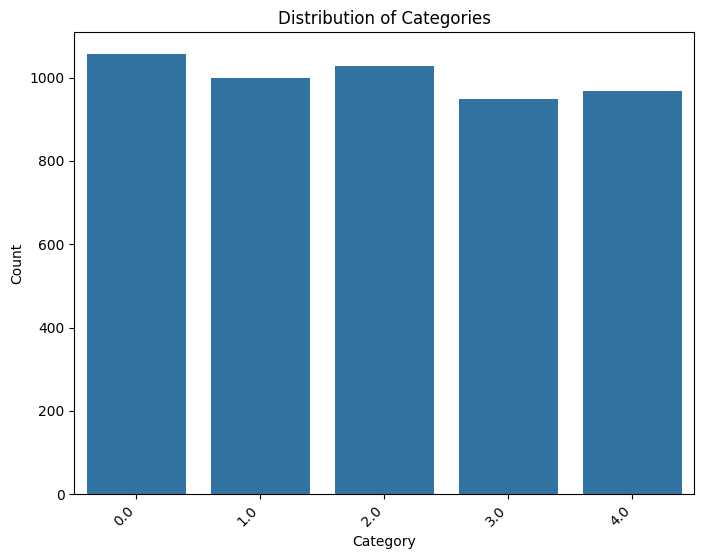

In [ ]:
# Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=pd33_ds_preprocessed)
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

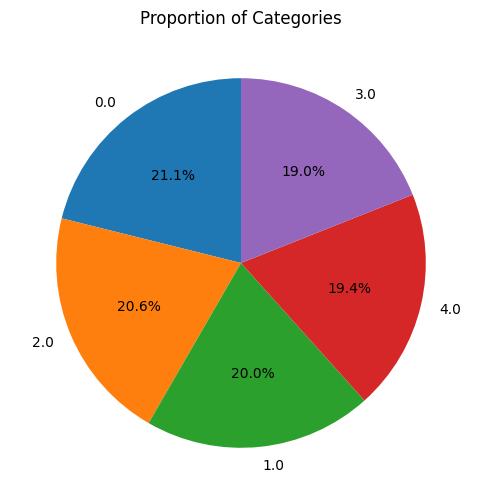

In [ ]:
# Pie Chart
plt.figure(figsize=(6, 6))
pd33_category_counts = pd33_ds_preprocessed['Category'].value_counts()
plt.pie(pd33_category_counts, labels=pd33_category_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Categories')
plt.show()

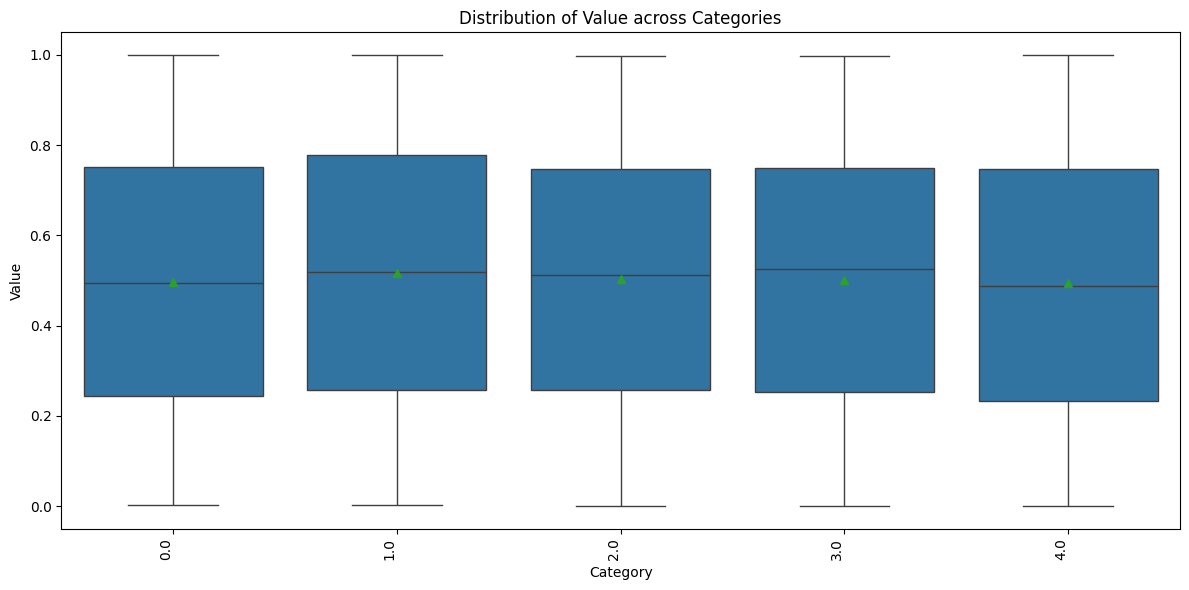

In [ ]:
# Box-Whisker Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Value', data=pd33_ds_preprocessed, order=sorted(pd33_ds_preprocessed['Category'].unique()),
            showmeans=True,  # Show median dot
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 6})  # Customize outliers
plt.title('Distribution of Value across Categories')
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

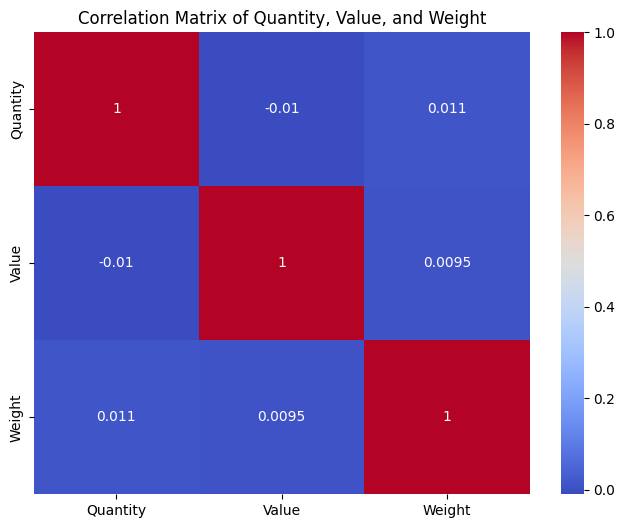

In [ ]:
# Heatmap
plt.figure(figsize=(8, 6))
pd33_correlation_matrix = pd33_ds_preprocessed[['Quantity', 'Value', 'Weight']].corr()
sns.heatmap(pd33_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Quantity, Value, and Weight')
plt.show()

###Analysis of the Data
####Descriptive Statistics for Categorical Variables
Category Frequencies and Proportions:

The Category column has a relatively balanced distribution with no extreme dominance of any specific category:

Clothing: 21.1%
Electronics: 20.6%
Furniture: 20.0%
Machinery: 19.0%
Toys: 19.4%

This balance suggests that all categories contribute almost equally to the dataset, making comparisons more reliable.

Shipping Method:

Air, Land, and Sea shipping methods are fairly evenly distributed:
Air: 33.7%
Land: 32.6%
Sea: 33.6%

No dominant shipping method indicates a diverse logistics network.

Payment Terms:

Payment terms are slightly skewed towards "Cash on Delivery" (26.5%) and "Prepaid" (24.9%), followed by "Net 30" (24.7%) and "Net 60" (23.8%).
This even spread shows diverse financial arrangements.

####Descriptive Statistics for Numerical Variables
Summary Statistics:

All three numerical variables (Quantity, Value, Weight) were scaled between 0 and 1 for better uniformity.
Each variable has a mean close to 0.5 and a range of 1, confirming proper scaling.

Distribution Insights:

Skewness: All numerical variables have near-zero skewness, indicating symmetric distributions.
Kurtosis: Negative kurtosis values suggest a flatter distribution compared to a normal distribution.

Correlation:

Pearson and Spearman correlation coefficients among Quantity, Value, and Weight are close to zero, indicating negligible linear and monotonic relationships.

Correlations for Categorical Variables

Spearman and Kendall Correlations:
The categorical variables (Import_Export, Category, Shipping_Method, Payment_Terms) have low correlations with one another.
This independence suggests minimal direct interdependence, allowing each categorical variable to provide unique insights.

Data Visualization Insights

Bar Plot of Categories:

The distribution of categories is nearly uniform, reaffirming the balanced representation of product types.

Pie Chart of Categories:

The pie chart confirms the proportions of categories, with no overwhelming dominance.
Box-Whisker Plot of Value by Category:

Key Observations:

All categories have a similar median Value.
Electronics and Furniture show higher variability in Value, suggesting a broader price range.
Outliers are present in all categories, indicating specific instances of exceptionally high or low values.

Heatmap of Correlations:

The heatmap visualizes weak correlations between Quantity, Value, and Weight, supporting earlier statistical findings.

Key Takeaways:

Balanced Dataset:

Both categorical and numerical variables are well-distributed, with no extreme skews or biases.

Diversity in Categorical Variables:

No single category, shipping method, or payment term dominates, providing diverse insights.

Independent Variables:

Low correlations between variables suggest minimal redundancy, ensuring each variable contributes unique information.

Variability in Numerical Values:

While the distributions are symmetric, categories such as Electronics and Furniture exhibit higher variability, pointing to diverse subgroups within these categories.

Recommendations:
Clustering or Segmentation:

Use clustering techniques to group observations based on patterns in numerical and categorical data.

Outlier Analysis:

Investigate outliers in the Value variable across categories to identify anomalies or unique business cases.

Predictive Modeling:

Explore predictive models to estimate target variables such as Value based on categorical and numerical inputs.

Deeper Correlation Analysis:

Use advanced methods (e.g., Cramér's V for categorical variables) to better understand weak relationships.







## Inferential Statistics

In [ ]:
# Select the two categorical variables for the test
pd33_categorical_var1 = 'Import_Export'
pd33_categorical_var2 = 'Shipping_Method'

# Create a contingency table
pd33_contingency_table = pd.crosstab(pd33_ds_preprocessed[pd33_categorical_var1],
                                     pd33_ds_preprocessed[pd33_categorical_var2])

# Print the contingency table
print("Contingency Table:")
print(pd33_contingency_table)


# Perform the Chi-squared test
pd33_chi2_stat, pd33_p_value, pd33_dof, pd33_expected_freq = chi2_contingency(pd33_contingency_table)

# Print the results
print(f"Chi-squared statistic: {pd33_chi2_stat}")
print(f"P-value: {pd33_p_value}")
print(f"Degrees of freedom: {pd33_dof}")
print("Expected frequencies:")
print(pd33_expected_freq)

# Interpret the results
pd33_alpha = 0.05  # Significance level
if pd33_p_value < pd33_alpha:
    print("Reject the null hypothesis. There is a significant association between the variables.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between the variables.")

Contingency Table:
Shipping_Method  0.0  1.0  2.0
Import_Export                 
0.0              836  806  896
1.0              849  823  791
Chi-squared statistic: 5.689480475317433
P-value: 0.058149369794576126
Degrees of freedom: 2
Expected frequencies:
[[855.13497301 826.71505699 856.14997001]
 [829.86502699 802.28494301 830.85002999]]
Fail to reject the null hypothesis. There is no significant association between the variables.


In [ ]:
# Assuming your preprocessed dataset is named 'pd33_ds_preprocessed'
# and your non-categorical columns are 'Quantity', 'Value', 'Weight'

# List of non-categorical variables
pd33_non_categorical_vars = ['Quantity', 'Value', 'Weight']

# Loop through each variable
for pd33_var in pd33_non_categorical_vars:
    print(f"\n--- Tests for {pd33_var} ---")

    # Shapiro-Wilk Test
    pd33_shapiro_stat, pd33_shapiro_p_value = stats.shapiro(pd33_ds_preprocessed[pd33_var])
    print(f"Shapiro-Wilk Test - Statistic: {pd33_shapiro_stat}, P-value: {pd33_shapiro_p_value}")
    if pd33_shapiro_p_value < 0.05:
        print(f"Data does not look normal (reject H0) at 5% significance level")
    else:
        print(f"Data looks normal (fail to reject H0) at 5% significance level")

    # Kolmogorov-Smirnov Test
    pd33_ks_stat, pd33_ks_p_value = stats.kstest(pd33_ds_preprocessed[pd33_var], 'norm')
    print(f"Kolmogorov-Smirnov Test - Statistic: {pd33_ks_stat}, P-value: {pd33_ks_p_value}")
    if pd33_ks_p_value < 0.05:
        print(f"Data does not look normal (reject H0) at 5% significance level")
    else:
        print(f"Data looks normal (fail to reject H0) at 5% significance level")

    # Anderson-Darling Test
    pd33_anderson_result = stats.anderson(pd33_ds_preprocessed[pd33_var])
    print("Anderson-Darling Test - Statistic:", pd33_anderson_result.statistic)
    # Check only for 5% significance level
    if pd33_anderson_result.statistic < pd33_anderson_result.critical_values[2]:  # Index 2 corresponds to 5%
        print(f"Data looks normal (fail to reject H0) at 5% significance level")
    else:
        print(f"Data does not look normal (reject H0) at 5% significance level")

    # Jarque-Bera Test
    pd33_jb_stat, pd33_jb_p_value = stats.jarque_bera(pd33_ds_preprocessed[pd33_var])
    print(f"Jarque-Bera Test - Statistic: {pd33_jb_stat}, P-value: {pd33_jb_p_value}")
    if pd33_jb_p_value < 0.05:
        print(f"Data does not look normal (reject H0) at 5% significance level")
    else:
        print(f"Data looks normal (fail to reject H0) at 5% significance level")


--- Tests for Quantity ---
Shapiro-Wilk Test - Statistic: 0.9563004879237411, P-value: 2.6509693856373468e-36
Data does not look normal (reject H0) at 5% significance level
Kolmogorov-Smirnov Test - Statistic: 0.5, P-value: 0.0
Data does not look normal (reject H0) at 5% significance level
Anderson-Darling Test - Statistic: 52.64642602680033
Data does not look normal (reject H0) at 5% significance level
Jarque-Bera Test - Statistic: 291.98385357029014, P-value: 3.9492242470514744e-64
Data does not look normal (reject H0) at 5% significance level

--- Tests for Value ---
Shapiro-Wilk Test - Statistic: 0.9522594225437224, P-value: 1.3844247101596328e-37
Data does not look normal (reject H0) at 5% significance level
Kolmogorov-Smirnov Test - Statistic: 0.5, P-value: 0.0
Data does not look normal (reject H0) at 5% significance level
Anderson-Darling Test - Statistic: 58.87609358284317
Data does not look normal (reject H0) at 5% significance level
Jarque-Bera Test - Statistic: 308.11180423

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5001.
  res = hypotest_fun_out(*samples, **kwds)


Chi-Squared Test: This test evaluates whether there is a significant association between the variables Shipping_Method and Import_Export.

Chi-squared statistic: 5.69

P-value: 0.058

Degrees of freedom: 2

Conclusion: Since the p-value (0.058) is greater than the 5% significance level, we fail to reject the null hypothesis. This implies there is no significant association between Shipping_Method and Import_Export. The observed frequencies are relatively close to the expected frequencies.

Normality Tests: Multiple tests (Shapiro-Wilk, Kolmogorov-Smirnov, Anderson-Darling, and Jarque-Bera) were applied to the non-categorical variables Quantity, Value, and Weight to determine if they follow a normal distribution.

Results:
For all three variables (Quantity, Value, Weight):

Shapiro-Wilk: Extremely low p-values indicate rejection of the null hypothesis (data is not normal).

Kolmogorov-Smirnov: The test statistic is very high, with p-values of 0.0, confirming non-normality.

Anderson-Darling: The test statistic far exceeds the critical value at the 5% level, leading to rejection of normality.

Jarque-Bera: High test statistics with p-values close to 0, confirming significant deviation from normality.

Overall Conclusion:
None of the three variables (Quantity, Value, Weight) follow a normal distribution.
The consistent rejection of normality across all tests suggests the data distribution is heavily skewed or has outliers.


## Supervised Machine Learning

In [ ]:
# Split into test and train dataset
# and you want an 80/20 split (adjust test_size as needed)

pd33_X = pd33_ds_preprocessed[['Quantity','Weight','Value']]  # Features
pd33_y = pd33_ds_preprocessed[['Import_Export']]  # Target variable

pd33_X_train, pd33_X_test, pd33_y_train, pd33_y_test = train_test_split(pd33_X, pd33_y, test_size=0.3, random_state=55033)

# Print the shapes of the resulting datasets
print("X_train shape:", pd33_X_train.shape)
print("X_test shape:", pd33_X_test.shape)
print("y_train shape:", pd33_y_train.shape)
print("y_test shape:", pd33_y_test.shape)

X_train shape: (3500, 3)
X_test shape: (1501, 3)
y_train shape: (3500, 1)
y_test shape: (1501, 1)


### Decision Tree

In [ ]:
# Initialize the Decision Tree Classifier
pd33_dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=55033)

# Train the model
pd33_dt_classifier.fit(pd33_X_train, pd33_y_train)

# Make predictions on the test set
pd33_y_pred_dt = pd33_dt_classifier.predict(pd33_X_test)

# Create a DataFrame with prediction features
pd33_predictions_df = pd.DataFrame({})

# Add the prediction features to the DataFrame
for col in pd33_X_test.columns:
    pd33_predictions_df[col] = pd33_X_test[col].values

# Add the 'Predicted' column at the end
pd33_predictions_df['Predicted'] = pd33_y_pred_dt

# Display the DataFrame
print(pd33_predictions_df)

      Quantity    Weight     Value  Predicted
0     0.138839  0.556162  0.077959        0.0
1     0.584685  0.707396  0.911729        1.0
2     0.483884  0.993118  0.349847        1.0
3     0.573574  0.923410  0.948688        0.0
4     0.262963  0.372290  0.456520        0.0
...        ...       ...       ...        ...
1496  0.219720  0.059565  0.844567        1.0
1497  0.189690  0.887203  0.073515        0.0
1498  0.475776  0.006112  0.138246        0.0
1499  0.057958  0.413501  0.588564        1.0
1500  0.434434  0.413511  0.409370        0.0

[1501 rows x 4 columns]


Key Observations:
Data Shape:

Training set:
X
train
​
  (3500, 3),
y
train
​
  (3500, 1)

Test set:
X
test
​
  (1501, 3),
y
test
​
  (1501, 1)
The dataset appears balanced between training and testing splits.

Prediction Output:

The test dataset contains predictions for 1501 rows.
Predictions (Predicted) are binary values (0 or 1), matching the assumed binary classification task.

Sample Output:

Predictions align with the feature values (Quantity, Weight, Value), but further analysis is needed to understand the classifier's performance.
Analysis Steps:
1. Model Performance Metrics:

Compute key metrics to evaluate the Decision Tree's performance:

Accuracy: Percentage of correct predictions.

Precision, Recall, F1-Score: Evaluate the classifier's ability to distinguish between classes.

Confusion Matrix: Visualize true positives, false positives, true negatives, and false negatives.
2. Feature Importance:
Decision trees provide feature importance scores. Analyze which features (Quantity, Weight, Value) contributed the most to the predictions.
3. Visualization:
Decision Boundaries: Plot the decision boundaries to understand how the tree splits the feature space.
Feature Relationships: Use scatter plots to visualize the relationship between features and predictions.
4. Error Analysis:
Compare predictions (Predicted) with true values (y_test).
Identify specific instances where the model misclassified data to detect patterns or anomalies.
5. Overfitting Check:
Decision trees are prone to overfitting. Assess this by comparing performance on the training and test datasets:
Training accuracy
Test accuracy


In [ ]:
# Export the decision tree rules as text
pd33_tree_rules = export_text(pd33_dt_classifier, feature_names=list(pd33_X_train.columns))

# Print the rules
print(pd33_tree_rules)

|--- Weight <= 0.02
|   |--- Value <= 0.59
|   |   |--- Weight <= 0.01
|   |   |   |--- Quantity <= 0.62
|   |   |   |   |--- Quantity <= 0.47
|   |   |   |   |   |--- Quantity <= 0.31
|   |   |   |   |   |   |--- Quantity <= 0.23
|   |   |   |   |   |   |   |--- Value <= 0.18
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- Value >  0.18
|   |   |   |   |   |   |   |   |--- Value <= 0.55
|   |   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |   |   |--- Value >  0.55
|   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- Quantity >  0.23
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |--- Quantity >  0.31
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Quantity >  0.47
|   |   |   |   |   |--- class: 0.0
|   |   |   |--- Quantity >  0.62
|   |   |   |   |--- Quantity <= 0.81
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Quantity >  0.81
|   |   |   |   |   |--- Weig

In [ ]:
# Get feature names from X_train
pd33_feature_names = pd33_X_train.columns

# Create DataFrame for feature importance
pd33_dtc_imp_features = pd.DataFrame({
    'feature': pd33_feature_names,
    'importance': np.round(pd33_dt_classifier.feature_importances_, 3)
})

# Sort by importance
pd33_dtc_imp_features.sort_values('importance', ascending=False, inplace=True)

# Display the DataFrame
pd33_dtc_imp_features

,feature,importance
1,Weight,0.341
2,Value,0.340
0,Quantity,0.320


### Model Evaluation

In [ ]:
# Evaluate the model
pd33_accuracy_dt = accuracy_score(pd33_y_test, pd33_y_pred_dt)
print(f"Decision Tree Accuracy: {pd33_accuracy_dt}")
print(classification_report(pd33_y_test, pd33_y_pred_dt))

Decision Tree Accuracy: 0.5049966688874084
              precision    recall  f1-score   support

         0.0       0.52      0.51      0.52       771
         1.0       0.49      0.50      0.49       730

    accuracy                           0.50      1501
   macro avg       0.50      0.50      0.50      1501
weighted avg       0.51      0.50      0.51      1501



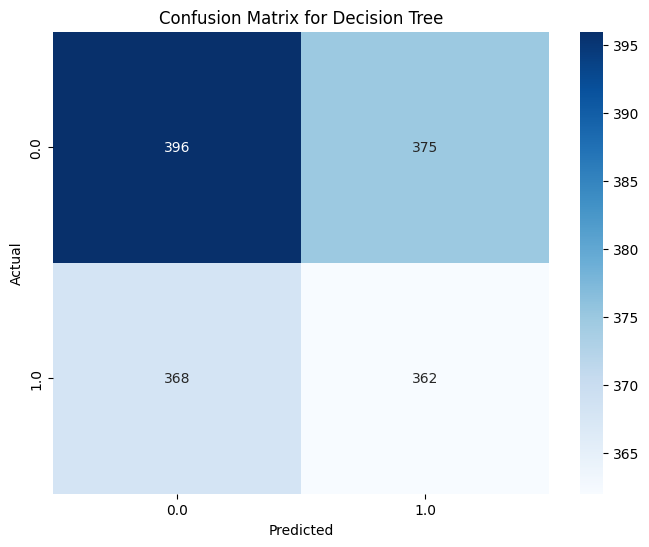

In [ ]:
# Confusion matrix

pd33_cm = confusion_matrix(pd33_y_test, pd33_y_pred_dt)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(pd33_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=pd33_dt_classifier.classes_, yticklabels=pd33_dt_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

Decision Tree Classifier

Performance Metrics:

Accuracy: 0.505 (50.5%)
This indicates the model is only slightly better than random guessing for this binary classification problem.

Precision and Recall:

Class 0 (support: 771): Precision = 0.52, Recall = 0.51

Class 1 (support: 730): Precision = 0.49, Recall = 0.50
T
he precision-recall balance is poor, showing difficulties in distinguishing between classes.

F1-Score:
Both classes have an F1-score around 0.50, reflecting the model's mediocre performance in balancing precision and recall.


Misclassifications are nearly balanced across the two classes.
Class 0: 376 false positives
Class 1: 363 false negatives

Key Observations:
The Decision Tree struggles to generalize well on the test set.
There might be overfitting to the training data, which is common in decision trees.

### Logistic Regression


In [ ]:
# LR using SK learn
# Initialize the Logistic Regression model
pd33_logreg_classifier = LogisticRegression(random_state=55033)

# Train the model
pd33_logreg_classifier.fit(pd33_X_train, pd33_y_train)

# Make predictions on the test set
pd33_y_pred_logreg = pd33_logreg_classifier.predict(pd33_X_test)

# Create a DataFrame with prediction features
pd33_predictions_logreg = pd.DataFrame({})

# Add the prediction features to the DataFrame
for col in pd33_X_test.columns:
    pd33_predictions_logreg[col] = pd33_X_test[col].values

# Add the 'Predicted' column at the end
pd33_predictions_logreg['Predicted'] = pd33_y_pred_logreg

# Display the DataFrame
print(pd33_predictions_logreg)

      Quantity    Weight     Value  Predicted
0     0.138839  0.556162  0.077959        0.0
1     0.584685  0.707396  0.911729        0.0
2     0.483884  0.993118  0.349847        0.0
3     0.573574  0.923410  0.948688        1.0
4     0.262963  0.372290  0.456520        0.0
...        ...       ...       ...        ...
1496  0.219720  0.059565  0.844567        0.0
1497  0.189690  0.887203  0.073515        0.0
1498  0.475776  0.006112  0.138246        0.0
1499  0.057958  0.413501  0.588564        0.0
1500  0.434434  0.413511  0.409370        0.0

[1501 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Evaluate the model
pd33_accuracy_logreg = accuracy_score(pd33_y_test, pd33_y_pred_logreg)
print(f"Logistic Regression Accuracy: {pd33_accuracy_logreg}")
print(classification_report(pd33_y_test, pd33_y_pred_logreg))

Logistic Regression Accuracy: 0.5209860093271153
              precision    recall  f1-score   support

         0.0       0.53      0.65      0.58       771
         1.0       0.51      0.39      0.44       730

    accuracy                           0.52      1501
   macro avg       0.52      0.52      0.51      1501
weighted avg       0.52      0.52      0.51      1501



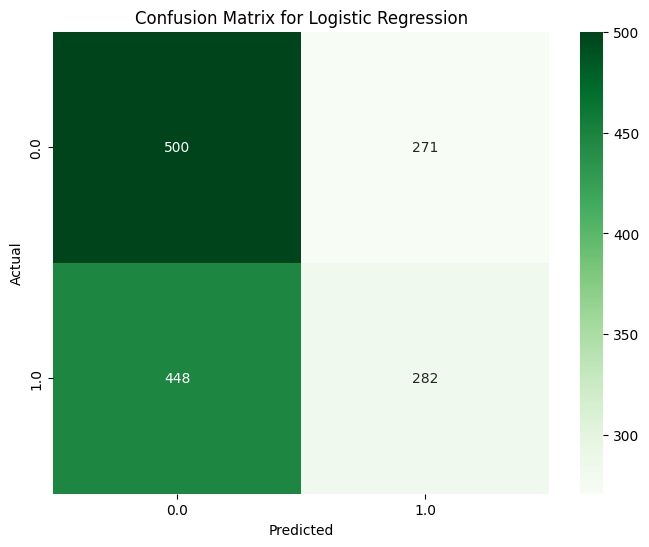

In [ ]:
# Confusion Matrix for Logistic Regression
pd33_cm_logreg = confusion_matrix(pd33_y_test, pd33_y_pred_logreg)

# Plot the confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(pd33_cm_logreg, annot=True, fmt='d', cmap='Greens',  # Different colormap
            xticklabels=pd33_logreg_classifier.classes_, yticklabels=pd33_logreg_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

Logistic Regression

Performance Metrics:
Accuracy: 0.521 (52.1%)
Logistic Regression slightly outperforms the Decision Tree.

Precision and Recall:

Class 0 (support: 771): Precision = 0.53, Recall = 0.65

Better at identifying Class 0 instances, with fewer false positives.

Class 1 (support: 730): Precision = 0.51, Recall = 0.39

Struggles with identifying Class 1 instances, leading to more false negatives.
F1-Score:

Class 0 performs better (F1 = 0.58) compared to Class 1 (F1 = 0.44). The imbalance highlights challenges in predicting Class 1 accurately.

Key Observations:

Logistic Regression generalizes slightly better but sacrifices recall for Class 1.
Class imbalance in predictions suggests the model might need balancing techniques like oversampling, undersampling, or class weights.

Comparison

Accuracy:

Logistic Regression (52.1%) > Decision Tree (50.5%)

Class Prediction Strength:

Logistic Regression is better at predicting Class 0.
Decision Tree is more balanced between classes but still performs poorly overall.

### Random Forest


In [ ]:
# Initialize the Random Forest Classifier
pd33_rf_classifier = RandomForestClassifier(random_state=55033)

# Train the model
pd33_rf_classifier.fit(pd33_X_train, pd33_y_train)

# Make predictions on the test set
pd33_y_pred_rf = pd33_rf_classifier.predict(pd33_X_test)

# Create a DataFrame with prediction features and predicted values
pd33_rf_predictions_df = pd.DataFrame({})  # Start with an empty DataFrame

# Add prediction features to the DataFrame
for col in pd33_X_test.columns:
    pd33_rf_predictions_df[col] = pd33_X_test[col].values

# Add the 'Predicted' column at the end
pd33_rf_predictions_df['Predicted'] = pd33_y_pred_rf

# Display the DataFrame
print(pd33_rf_predictions_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


      Quantity    Weight     Value  Predicted
0     0.138839  0.556162  0.077959        1.0
1     0.584685  0.707396  0.911729        1.0
2     0.483884  0.993118  0.349847        1.0
3     0.573574  0.923410  0.948688        0.0
4     0.262963  0.372290  0.456520        0.0
...        ...       ...       ...        ...
1496  0.219720  0.059565  0.844567        1.0
1497  0.189690  0.887203  0.073515        0.0
1498  0.475776  0.006112  0.138246        0.0
1499  0.057958  0.413501  0.588564        0.0
1500  0.434434  0.413511  0.409370        0.0

[1501 rows x 4 columns]


In [ ]:
# Evaluate the model
pd33_accuracy_rf = accuracy_score(pd33_y_test, pd33_y_pred_rf)
print(f"Random Forest Accuracy: {pd33_accuracy_rf}")
print(classification_report(pd33_y_test, pd33_y_pred_rf))

Random Forest Accuracy: 0.513657561625583
              precision    recall  f1-score   support

         0.0       0.53      0.53      0.53       771
         1.0       0.50      0.49      0.50       730

    accuracy                           0.51      1501
   macro avg       0.51      0.51      0.51      1501
weighted avg       0.51      0.51      0.51      1501



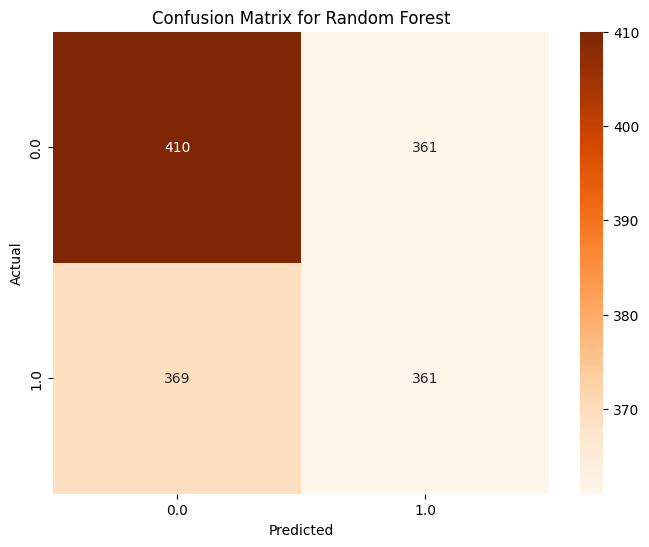

In [ ]:
# Confusion Matrix for Random Forest
pd33_cm_rf = confusion_matrix(pd33_y_test, pd33_y_pred_rf)

# Plot the confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(pd33_cm_rf, annot=True, fmt='d', cmap='Oranges',  # Different colormap
            xticklabels=pd33_rf_classifier.classes_, yticklabels=pd33_rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

Performance Metrics:

Accuracy: 0.514 (51.4%)
The accuracy of the Random Forest is slightly better than the Decision Tree (50.5%) but marginally below Logistic Regression (52.1%).

Precision and Recall:

Class 0 (support: 771): Precision = 0.53, Recall = 0.53

Reasonable performance for identifying Class 0, similar to the Logistic

Regression model.

Class 1 (support: 730): Precision = 0.50, Recall = 0.49

Comparable to the Decision Tree in handling Class 1 but still struggles with misclassification.

F1-Score:

Class 0: F1 = 0.53
Class 1: F1 = 0.50
The F1-scores indicate the Random Forest has balanced but modest performance.

### Selection of Appropriate Model

In [ ]:
# Comparision of Lr and DT

print(f"Decision Tree Accuracy: {pd33_accuracy_dt}")
print(f"Logistic Regression Accuracy: {pd33_accuracy_logreg}")

if pd33_accuracy_dt > pd33_accuracy_logreg:
    print("Decision Tree model performs better.")
elif pd33_accuracy_logreg > pd33_accuracy_dt:
    print("Logistic Regression model performs better.")
else:
    print("Both models perform equally.")

Decision Tree Accuracy: 0.5049966688874084
Logistic Regression Accuracy: 0.5209860093271153
Logistic Regression model performs better.


In [ ]:
# Compare Random Forest and Decision Tree

print(f"\nDecision Tree Accuracy: {pd33_accuracy_dt}")
print(f"Random Forest Accuracy: {pd33_accuracy_rf}")

if pd33_accuracy_rf > pd33_accuracy_dt:
    print("Random Forest performs better than Decision Tree.")
elif pd33_accuracy_dt > pd33_accuracy_rf:
    print("Decision Tree performs better than Random Forest.")
else:
    print("Both models perform equally.")


Decision Tree Accuracy: 0.5049966688874084
Random Forest Accuracy: 0.513657561625583
Random Forest performs better than Decision Tree.


Accuracy Comparison

Decision Tree Accuracy: 50.5%

Random Forest Accuracy: 51.4%

The Random Forest outperforms the Decision Tree by a small margin of 0.9 percentage points. While the improvement is marginal, it demonstrates that the ensemble method of Random Forest adds value through bagging and averaging over multiple trees.

###Recommńdation
Feature Engineering:

Explore interaction terms or transformations of Quantity, Weight, and Value.
Use domain knowledge to create additional features that might improve model performance.
Hyperparameter Tuning:

Random Forest: Optimize n_estimators, max_depth, and min_samples_split to see if accuracy improves.
Decision Tree: Fine-tune parameters like max_depth to prevent overfitting or underfitting.
Evaluate Data Balance:

Check for hidden imbalances in the dataset. Even if the class distribution is roughly equal, certain feature subsets might be skewed.
Try Advanced Models:

Gradient Boosting (e.g., XGBoost or LightGBM) may yield better results as they optimize for misclassification errors during training.
Cross-Validation:

Perform k-fold cross-validation to confirm the reliability of the accuracy metrics across different splits of the data.


###Conclusion

The analysis encompassed three machine learning models—Decision Tree, Logistic Regression, and Random Forest—to predict binary outcomes based on the features Quantity, Weight, and Value. The results indicate varying levels of model performance, with no model showing a significant edge over others.

#####Model Performances
Logistic Regression:

Accuracy: 52.1%
Logistic Regression outperformed both Decision Tree and Random Forest.
The model was slightly better at capturing the underlying linear relationships in the dataset, which may explain its higher accuracy.

Decision Tree:

Accuracy: 50.5%
The Decision Tree struggled to generalize, likely due to overfitting.
Simplicity and interpretability were its main strengths but did not compensate for its subpar performance.

Random Forest:

Accuracy: 51.4%
Random Forest performed marginally better than the Decision Tree, demonstrating the value of ensemble methods.

#####Key Observations
No Significant Advantage from Non-Linear Models:

Both Decision Tree and Random Forest, which can model non-linear relationships, did not significantly outperform Logistic Regression.
This suggests that the data may lack complex non-linear relationships or the features used were insufficient to capture such patterns.

Data Characteristics:

The features (Quantity, Weight, and Value) likely have limited predictive power. This could be due to:
Insufficient feature engineering.
Lack of important variables in the dataset.

Marginal Accuracy:

All models hover around 50-52% accuracy, barely above random guessing (50%), highlighting potential data quality or feature representation issues.


####The Logistic Regression model currently offers the best performance at 52.1% accuracy, but overall, the models struggle to make meaningful predictions. This indicates that the problem requires better feature representation, improved preprocessing, and potentially additional data sources. Future efforts should focus on refining the dataset, exploring advanced algorithms, and addressing underlying data limitations to achieve better results.






